# ÊäìÂèñÂçö‰∏ª‰∏ªÈ°µ
### ÂÆâË£Öweibo_spider
```bash
python3 -m pip install weibo_spider
```
### ÊäìÂèñÂçö‰∏ª‰∏ªÈ°µÂÜÖÂÆπ
*Ê≥®Ôºöweibo‰∏∫ËæìÂá∫ÁõÆÂΩïÔºåconfig.json‰∏∫ÈÖçÁΩÆÊñá‰ª∂ÔºåÂèØ‰ª•ËÆæÁΩÆÊäìÂèñÂÜÖÂÆπ*
```bash
python3 -m weibo_spider --output_dir="data" --config_path="weiboSpider/config.json"
```
*ÈÖçÁΩÆÊñá‰ª∂Á§∫‰æã*
```json
{
    "user_id_list": ["user id"],
    "filter": 1,
    "since_date": "2021-01-01",
    "end_date": "now",
    "random_wait_pages": [1, 5],
    "random_wait_seconds": [6, 10],
    "global_wait": [[1000, 3600], [500, 2000]],    
    "write_mode": ["csv","txt"],
    "pic_download": 0,
    "video_download": 0,
    "result_dir_name": 0,
    "cookie": "your cookie",
    "sqlite_config": "weibo.db"
}
```

# ËØªÂèñÊäìÂèñÊï∞ÊçÆ

In [17]:
import pandas as pd
df = pd.read_csv("data/Â∞ëÊï∞Ê¥æsspai/1914010467.csv")
article=df["ÂæÆÂçöÊ≠£Êñá"]
likes=df["ÁÇπËµûÊï∞"]

# ÁîüÊàêÂ∏ñÂ≠êËØç‰∫ë

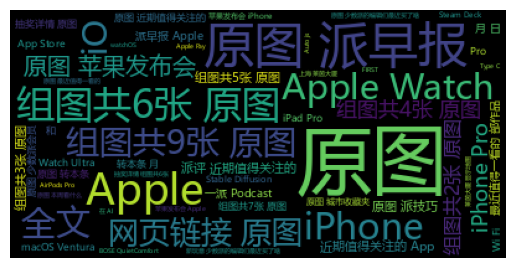

In [18]:
from wordcloud import WordCloud
import PIL .Image as image
text = " ".join(i for i in article)
wordcloud=WordCloud(font_path="data/msyh.ttc").generate(text)
word_image=wordcloud.to_image()
word_image.save('data/Âçö‰∏ªÂ∏ñÂ≠êËØç‰∫ë.png','png')
# ÊòæÁ§∫ÂõæÁâá
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

lena = mpimg.imread('data/Âçö‰∏ªÂ∏ñÂ≠êËØç‰∫ë.png')
plt.imshow(lena)
plt.axis('off')
plt.show()

# Â∏ñÂ≠êÁÉ≠Â∫¶ÁªüËÆ°

In [26]:
# ÂØºÂÖ•Â∫ì
from matplotlib import font_manager
from datetime import datetime
likes=df.loc[:,"ÁÇπËµûÊï∞"]
comment=df.loc[:,"ËØÑËÆ∫Êï∞"]
forward=df.loc[:,"ËΩ¨ÂèëÊï∞"]
s=df.loc[:,"ÂèëÂ∏ÉÊó∂Èó¥"]
print()
l=[]
i=1
while i<len(s):
    l.append(datetime.strptime(str(s[i]),"%Y-%m-%d %H:%M"))
    i+=1
time=pd.DataFrame(l)
my_font = font_manager.FontProperties(fname=r"data/msyh.ttc")
plt.figure(figsize=(15,8),dpi=80)
plt.plot(range(len(likes)), likes, label='ÁÇπËµûÊï∞',color="r")
plt.plot(range(len(comment)), comment, label='ËØÑËÆ∫Êï∞',color="b")
plt.plot(range(len(forward)), forward, label='ËΩ¨ÂèëÊï∞',color="y")
# ËÆæÁΩÆxÔºåyÂùêÊ†á
plt.xticks(time)
plt.yticks(range(500))
# ËÆæÁΩÆÁΩëÊ†ºÁ∫ø
plt.grid(alpha=0.2)
plt.legend(prop=my_font,loc="upper left")
plt.title('ÂæÆÂçöÁÉ≠Â∫¶ÊäòÁ∫øÂõæ',fontproperties=my_font)
plt.show()
plt.savefig('data/Â∏ñÂ≠êÁÉ≠Â∫¶ÁªüËÆ°.png')



ValueError: time data 'ÂèëÂ∏ÉÊó∂Èó¥' does not match format '%Y-%m-%d %H:%M'

# Áà¨ÂèñÂæÆÂçöÁÉ≠Êêú

In [21]:
import requests
import json
from bs4 import BeautifulSoup
import schedule
import time
import csv
from xlutils.copy import copy
url = 'https://s.weibo.com/top/summary?Refer=top_hot&topnav=1&wvr=6'
with open('data/ÂæÆÂçöÁÉ≠Êêú.csv', 'a+', newline='') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(['Êó∂Èó¥', 'ÊéíÂêç', 'ÁÉ≠Â∫¶', 'ÂÜÖÂÆπ'])
def run():
    header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.54 Safari/537.36',
        'Cookie': 'WEIBOCN_WM=3349; MLOGIN=0; loginScene=102003; SUB=_2A25OZUb0DeRhGeFM71cR8SjPyTyIHXVtpmq8rDV6PUJbkdANLUTtkW1NQNrR0hDYvbkyXXHvhSXTK6gLZwPIvqhj; _T_WM=2f61b9622f544de949daf22f40ebcc99'
    }
    cookie = {
        'Cookie': ''
    }
    response = requests.get(url, headers=header, cookies=cookie)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    items = soup.find_all('td', class_='td-02')
    time_stamp = time.strftime('%Y/%m/%d %H:%M', time.localtime(time.time()))  # Êó∂Èó¥Êà≥

    for i, item in enumerate(items[1:11]):
        result = []
        rank = 'Á¨¨{0}Âêç'.format(i+1)     # ÂæÆÂçöÊéíÂêç
        num = str(item.find('span')).replace('<span>', '').replace('</span>', '')  # ÂæÆÂçöÁÉ≠Â∫¶
        title = item.find('a').text  # ÂæÆÂçöÂÜÖÂÆπ
        result.append(time_stamp)
        result.append(rank)
        result.append(num)
        result.append(title)
        with open('data/ÂæÆÂçöÁÉ≠Êêú.csv', 'a+',newline='') as f:
            f_csv = csv.writer(f)
            f_csv.writerow(result)
    print(time_stamp)
run()
schedule.every(30).seconds.do(run)
while True:
    schedule.run_pending()


2022/11/11 18:38
1
2022/11/11 18:38
2022/11/11 18:38
2022/11/11 18:39
1
2022/11/11 18:39
2022/11/11 18:39
2022/11/11 18:39
1
2022/11/11 18:39
2022/11/11 18:39


KeyboardInterrupt: 

# Âä®ÊÄÅÁÉ≠ÊêúÂõæ

In [59]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline,Grid
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
import pandas as pd
data=pd.read_csv('data/ÂæÆÂçöÁÉ≠Êêú.csv')
tl = Timeline({"theme": ThemeType.MACARONS})

# ÊåáÂÆöÁÉ≠ÊêúÂõæÊåÅÁª≠ÁöÑÂàÜÈíüÊï∞
for i in range(20):
    bar = (
        Bar({"theme": ThemeType.MACARONS})
        .add_xaxis(list(data['ÂÜÖÂÆπ'])[i*10:i*10+10][::-1])
        .add_yaxis("ÂæÆÂçöÁÉ≠ÊêúÊ¶ú", list(data['ÁÉ≠Â∫¶'])[i*10:i*10+10][::-1])
        .reversal_axis()
        .set_global_opts(
            title_opts=opts.TitleOpts("{}".format(list(data['Êó∂Èó¥'])[i*10]),pos_right='0%',pos_bottom='15%'),
            xaxis_opts=opts.AxisOpts(
                splitline_opts=opts.SplitLineOpts(is_show=True),
                position='top',
                name_gap=10,
                boundary_gap=['20%', '20%']),
            yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True),
                                     axislabel_opts=opts.LabelOpts(color='#FF7F50')),)
        .set_series_opts(label_opts=opts.LabelOpts(position="right",color='#9400D3'))
    )
    grid = (
        Grid()
        .add(bar, grid_opts=opts.GridOpts(pos_left="25%",pos_right="0%"))
    )
    tl.add(grid, "{}ÂàÜ".format(i))
    tl.add_schema(
        play_interval=1000,   #Êí≠ÊîæÈÄüÂ∫¶
        is_timeline_show=False,  #ÊòØÂê¶ÊòæÁ§∫ timeline ÁªÑ‰ª∂
        is_auto_play=True,
    )
tl.render('data/ÂæÆÂçöÁÉ≠ÊêúÊ¶ú.html')

'/home/dky/Github/Mine/python-practice/day07/weibo/data/ÂæÆÂçöÁÉ≠ÊêúÊ¶ú.html'

# ÁîüÊàêÁÉ≠ÊêúËØç‰∫ë

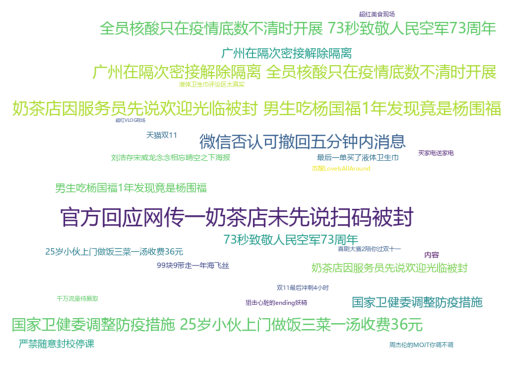

In [62]:
# ÂØºÂÖ•Â∫ì
from wordcloud import WordCloud
import PIL .Image as image
import imageio


hots=data['ÂÜÖÂÆπ']
text = " ".join(i for i in hots)
wordcloud=WordCloud(font_path="data/msyh.ttc",
                    width=1000,
                    height=700,
                    background_color='white').generate(text)
word_image=wordcloud.to_image()
word_image.save('data/ÁÉ≠ÊêúËØç‰∫ë.png','png')
# ÊòæÁ§∫ÂõæÁâá
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

lena = mpimg.imread('data/ÁÉ≠ÊêúËØç‰∫ë.png')
plt.imshow(lena)
plt.axis('off')
plt.show()

# ÊåâÂÖ≥ÈîÆËØçÊêúÁ¥¢ÂÜÖÂÆπ

In [32]:
import requests
import re 
import os
import urllib.parse
import time
import pandas as pd
#headerÊñá‰ª∂     
headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:76.0) Gecko/20100101 Firefox/76.0)',
    'Cookie': 'WEIBOCN_WM=3349; MLOGIN=0; loginScene=102003; SUB=_2A25OZUb0DeRhGeFM71cR8SjPyTyIHXVtpmq8rDV6PUJbkdANLUTtkW1NQNrR0hDYvbkyXXHvhSXTK6gLZwPIvqhj; _T_WM=2f61b9622f544de949daf22f40ebcc99'
}
#ÊêúÁ¥¢ÂêçËØç
keyword = 'iphone'
#ÂàõÂª∫ÂêåÂêçÊñá‰ª∂Â§π
filepath = str(r'data/'+keyword)
if not os.path.exists(filepath):
    os.mkdir(filepath)
#ÊêúÁ¥¢ÂêçËØç‰∏ã40È°µÊ∫êÁ†ÅÂπ∂‰øùÂ≠ò‰∏∫txtÊñá‰ª∂
kw=urllib.parse.quote(keyword)
s_url ='https://s.weibo.com/weibo?q='+kw+'&wvr=6&b=1&Refer=SWeibo_box'
f = requests.get(s_url,headers = headers)
# Ëé∑ÂèñÊêúÁ¥¢Âà∞ÁöÑÂâç40Êù°Êï∞ÊçÆ
for i in range(40):
  html = requests.get(s_url+'&page='+str(i),headers = headers)
  html = html.text
  html =urllib.parse.unquote(html)
  with open(filepath+'/'+keyword+'.txt','a',encoding ="utf-8") as f:
     f.write(html)
  time.sleep(0.5)
#ÊâìÂºÄËØ•Êñá‰ª∂  
with open(filepath+'/'+keyword+'.txt','r',encoding ="utf-8") as h:
     html = h.read()
#Ëß£ÊûêÂÜÖÂÆπÂπ∂‰∏ãËΩΩ          
uids = re.findall('<a href="//weibo.com/(.*?)?refer_flag=1001030103_" class=".*?" target=".*?" nick-name="(.*?)" suda-data=".*?">.*?</a>',html)
contents = re.findall(' <p class="txt" node-type="feed_list_content" nick-name=".*?">(.*?)</p>',html,re.S)
pic_id = re.findall('<!--card-wrap-->(.*?)<!--/card-wrap-->',html,re.S)
data=pd.DataFrame(columns = range(3))
data.columns=['Áî®Êà∑Âêç','Áî®Êà∑id','Â∏ñÂ≠ê']
for i in range(len(uids)):
    uid,nickname = uids[i]
    data = pd.concat([data, pd.DataFrame.from_records([{ 'Áî®Êà∑id': uids[i][0],'Áî®Êà∑Âêç': uids[i][1], 'Â∏ñÂ≠ê': re.sub('<.*?>','',contents[i],re.S)}])])
print(data)
data.to_csv("data/ÊêúÁ¥¢ÁªìÊûú.csv")


             Áî®Êà∑Âêç         Áî®Êà∑id  \
0          Ë¥¢ÁªèÁΩëÁßëÊäÄ  5061229888?   
0           ËÄÅÊùøËÅîÊí≠  5994003317?   
0        UNCLEÁñØÂèî  2322312760?   
0           Á©∫‰∏ÄÊ†ºÂêõ  2174397023?   
0   ÂêÉÈ•≠Áù°ËßâËÆ§ÁúüÂ∑•‰Ωú2020  3164187354?   
..           ...          ...   
0       ChillsÁâôÁâô  6560668913?   
0         oÊ¨ßÂñîÂì¶Âô¢o  1635818482?   
0        ÊâæÂêåÊ¨æÁöÑÊùéÁÇπÁÇπ  3173696070?   
0    Âú®ÊÖàÂÆÅÂÆ´ÁÉ§Èù¢ÂåÖÁöÑÂ∞èÈ∏≠ÂèΩ  7729882073?   
0      Áà±ÂêÉÈ¶ôËèú_June  6962195102?   

                                                   Â∏ñÂ≠ê  
0   \n                    #ÂõΩ‰∫∫‰π∞iPhone14ProÈúÄÂ∑•‰Ωú22Â§©#„ÄêÂÖ®...  
0   \n                    „ÄêËãπÊûúÁß∞#iPhone14ProÊî∂Ë¥ßÈúÄË¶ÅÁ≠âÂæÖÊõ¥Èïø...  
0   \n                    ËøëÂá†Âπ¥ÁúüÊ≠£ËÉΩÂπ≥Ë°°Âà∞ÈáçÈáè/Â∞∫ÂØ∏/ËßÇÊÑüÁöÑiPhone...  
0   \n                    ËãπÊûú‰ªäÂ§©Â∞±ÈÉëÂ∑ûÂØåÂ£´Â∫∑Áñ´ÊÉÖÂèëË°®Â£∞ÊòéÔºåÁÆÄÂçïËØ¥Â∞±ÊòØÂ∑•‰∫∫...  
0   \n                    ÂûÉÂúæËãπÊûúÔºåÂÅö‰∏™ÈïøÊà™ÂõæÂäüËÉΩÂæàÈöæÂêó&#xe627;i...  

# Áà¨ÂèñËØÑËÆ∫Âå∫

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

def fetchurl(pid,uid,max_id):
    url = "https://weibo.com/ajax/statuses/buildComments"
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:76.0) Gecko/20100101 Firefox/76.0)',
        'Cookie': 'WEIBOCN_WM=3349; MLOGIN=0; loginScene=102003; SUB=_2A25OZUb0DeRhGeFM71cR8SjPyTyIHXVtpmq8rDV6PUJbkdANLUTtkW1NQNrR0hDYvbkyXXHvhSXTK6gLZwPIvqhj; _T_WM=2f61b9622f544de949daf22f40ebcc99'
    }
    params = {
        "flow": 0,
        "is_reload": 1,
        "id": pid,
        "is_show_bulletin": 2,
        "is_mix": 0,
        "max_id": max_id,
        "count": 20,
        "uid": uid,
    }
    r = requests.get(url,headers=headers,params=params)
    return r.json()
def parseJson(jsonObj):
    data = jsonObj["data"]
    max_id = jsonObj["max_id"]
    commentData=[]
    for item in data:
        # ËØÑËÆ∫id
        comment_Id = item["id"]
        # ËØÑËÆ∫ÂÜÖÂÆπ
        content = BeautifulSoup(item["text"], "html.parser").text
        # ËØÑËÆ∫Êó∂Èó¥
        created_at = item["created_at"]
        # ÁÇπËµûÊï∞
        like_counts = item["like_counts"]
        # ËØÑËÆ∫Êï∞
        total_number = item["total_number"]

        # ËØÑËÆ∫ËÄÖ idÔºånameÔºåcity
        user = item["user"]
        userID = user["id"]
        userName = user["screen_name"]
        userCity = user["location"]
        userGender= user["gender"]
        dataItem = [comment_Id, created_at, userID, userName, userGender,userCity, like_counts, total_number, content]
        commentData.append(dataItem)
    return commentData,max_id
def save_data(data, path, filename):

    if not os.path.exists(path):
        os.makedirs(path)

    dataframe = pd.DataFrame(data)
    dataframe.to_csv(path + filename, encoding='utf_8_sig', mode='a', index=False, sep=',', header=False )
if __name__ == "__main__":

    pid = 4717939545342043      # ÂæÆÂçöid
    uid = 6512991534            # Áî®Êà∑id
    max_id = 0
    path = "./data/"           # ‰øùÂ≠òÁöÑË∑ØÂæÑ
    filename = "ÂæÆÂçöËØÑËÆ∫.csv"   # ‰øùÂ≠òÁöÑÊñá‰ª∂Âêç

    csvHeader = [["ËØÑËÆ∫id", "ÂèëÂ∏ÉÊó∂Èó¥", "Áî®Êà∑id", "ÊòµÁß∞","ÊÄßÂà´", "ÂüéÂ∏Ç", "ÁÇπËµûÊï∞", "ÂõûÂ§çÊï∞", "ËØÑËÆ∫ÂÜÖÂÆπ"]]
    save_data(csvHeader, path, filename)

    while(True):
        html = fetchurl(pid, uid, max_id)
        comments, max_id = parseJson(html)
        save_data(comments, path, filename)
        # Áà¨ÂèñÁªìÊùü
        if max_id == 0:
            break;


KeyboardInterrupt: 

# ÁªòÂà∂ËØÑËÆ∫Âå∫ipÂΩíÂ±ûÂú∞Âú∞Âõæ

In [2]:
from pyecharts.charts import Geo
import pandas as pd
df = pd.read_csv('data/ÂæÆÂçöËØÑËÆ∫.csv')
# Âª∫Á´ãgeoÂùêÊ†áÁ≥ª
geo = Geo()
attr=list(df["ÂüéÂ∏Ç"])
# value = list(df["ÂüéÂ∏Ç"].value_counts())

# Âü∫Á°ÄÊï∞ÊçÆ
city=df["ÂüéÂ∏Ç"].value_counts()
print(city.index.dtype)
data=[["Âπø‰∏ú"],["Â±±‰∏ú"],["Ê≤≥Âçó"],["ÂõõÂ∑ù"],["Ê±üËãè"],["Ê≤≥Âåó"],["ÊπñÂçó"],["ÂÆâÂæΩ"],["ÊµôÊ±ü"],["ÊπñÂåó"],["ÂπøË•ø"],["‰∫ëÂçó"],["Ê±üË•ø"],["ËæΩÂÆÅ"],["ÈªëÈæôÊ±ü"],["ÈôïË•ø"],["Â±±Ë•ø"],["Á¶èÂª∫"],["ÈáçÂ∫Ü"],["Ë¥µÂ∑û"],["ÂêâÊûó"],["ÁîòËÇÉ"],["ÂÜÖËíôÂè§"],["‰∏äÊµ∑"],["Âè∞Êπæ"],["Êñ∞ÁñÜ"],["Âåó‰∫¨"],["Â§©Ê¥•"],["Êµ∑Âçó"],["È¶ôÊ∏Ø"],["ÈùíÊµ∑"],["ÂÆÅÂ§è"],["Ë•øËóè"],["Êæ≥Èó®"],["Êµ∑Â§ñ"]]
loc=[]
i=0
while i<len(data):
    j=0
    sum=0.0
    while j<len(city):
        # print(city.index[j].find(data[i][0]))
        if city.index[j].find(data[i][0]) !=-1:
            sum=sum+city[j]
        j+=1
    data[i].append(sum)
    i+=1
i=0
while i<len(data):
    data[i]=tuple(data[i])
    i+=1
# print(data)

# ÁªòÂà∂Âú∞Âõæ
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
map=(
    Map()
    .add("",data,"china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="ËØÑËÆ∫Âå∫ipÂΩíÂ±ûÂú∞Âú∞Âõæ",subtitle="Êï∞ÊçÆÊù•Ê∫êÔºöÂæÆÂçöËØÑËÆ∫Âå∫IPÂΩíÂ±ûÂú∞",pos_right="center",pos_top="5%"),
        visualmap_opts=opts.VisualMapOpts(max_=50),
    )  
)
map.render('data/ËØÑËÆ∫Âå∫ipÂΩíÂ±ûÂú∞Âú∞Âõæ.html')

object


'/home/dky/Github/Mine/python-practice/day07/weibo/data/ËØÑËÆ∫Âå∫ipÂΩíÂ±ûÂú∞Âú∞Âõæ.html'

# Áî®Êà∑Ë°®ÊÉÖ‰ΩøÁî®ÁªüËÆ°

In [16]:
# ÂØºÂÖ•Â∫ì
import re
import pandas as pd

# ËøáÊª§Ë°®ÊÉÖ
def filter_str(desstr, restr=''):
    res = re.compile('[^\U00010000-\U0010ffff]',flags=re.UNICODE)
    return res.sub(restr, desstr)

data=pd.read_csv("data/ÂæÆÂçöËØÑËÆ∫.csv")
comments=data["ËØÑËÆ∫ÂÜÖÂÆπ"]
gender=data["ÊÄßÂà´"]
lists=[]
i=0
while i<len(comments):
    if filter_str(str(comments[i])):
        lists.append(filter_str(str(comments[i])))
    i+=1
lists=list(set(lists))
values=[]
i=0
while i<len(lists):
    j=0
    sum_male=0
    sum_female=0
    while j < len(comments):
        if filter_str(str(comments[j]))==lists[i]:
            if gender[j]=="f":
                sum_female+=1
            else:
                sum_male+=1
        j+=1
    values.append([lists[i],sum_male,sum_female,sum_female+sum_male])
    i+=1
data=pd.DataFrame(values)
data.columns=["Ë°®ÊÉÖ","Áî∑","Â•≥","È¢ëÁéá"]
data.to_csv("data/Áî®Êà∑Ë°®ÊÉÖ‰ΩøÁî®ÁªüËÆ°.csv")